# Import Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input,Dense,AveragePooling2D,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
from keras.models import save_model

Using TensorFlow backend.


# Data Preprocessing

In [2]:
DATADIR = "C:/Users/Devadutt/Documents/Desktop/Dataset"

In [3]:
CATEGORIES = ["Bad Groundnut","Bad Moongdal","Bad Pigeonpea","Good Groundnut","Good Moongdal","Good Pigeonpea"]

In [4]:
INIT_LR = 0.001
EPOCHS = 10
BS = 16

In [5]:
data = []
labels = []
dataset=[0,0,0,0,0,0]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    catnum = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        
        data.append(image)
        labels.append(catnum)
        dataset[CATEGORIES.index(category)]+=1

In [6]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [7]:
dicto={}
for i in range(0,len(dataset)):
    dicto[i] = [CATEGORIES[i],dataset[i]]
dicto[i] = ["Total",sum(dataset)]
df = pd.DataFrame.from_dict(dicto,orient='index',columns=['Seed type','Image count'])
display(df)

,Seed type,Image count
0,Bad Groundnut,47
1,Bad Moongdal,50
2,Bad Pigeonpea,54
3,Good Groundnut,51
4,Good Moongdal,78
5,Total,333


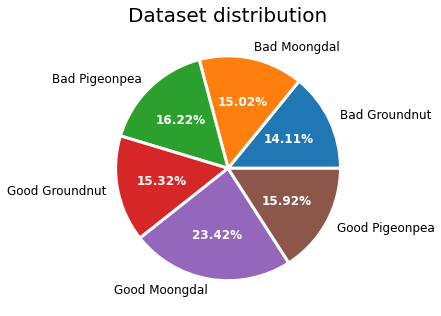

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
patches, texts, pcts = ax.pie(dataset, labels=CATEGORIES, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'})
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Dataset distribution', fontsize=20)
plt.tight_layout()

In [9]:
data.shape

(333, 224, 224, 3)

In [10]:
labels.shape

(333,)

In [11]:
labels = to_categorical(labels,6)

In [12]:
labels.shape

(333, 6)

# Test and Train data split

In [13]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state = 42)

In [14]:
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(266, 224, 224, 3) (67, 224, 224, 3) (266, 6) (67, 6)


# Image Augmentation

In [15]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

# Model Preparation

In [16]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [17]:
for layer in baseModel.layers:
    layer.trainable = False

In [18]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(6, activation="softmax")(headModel)

In [19]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [21]:
for layer in model.layers:
    print(layer.output_shape)

[(None, 224, 224, 3)]
(None, 112, 112, 32)
(None, 112, 112, 32)
(None, 112, 112, 32)
(None, 112, 112, 32)
(None, 112, 112, 32)
(None, 112, 112, 32)
(None, 112, 112, 16)
(None, 112, 112, 16)
(None, 112, 112, 96)
(None, 112, 112, 96)
(None, 112, 112, 96)
(None, 113, 113, 96)
(None, 56, 56, 96)
(None, 56, 56, 96)
(None, 56, 56, 96)
(None, 56, 56, 24)
(None, 56, 56, 24)
(None, 56, 56, 144)
(None, 56, 56, 144)
(None, 56, 56, 144)
(None, 56, 56, 144)
(None, 56, 56, 144)
(None, 56, 56, 144)
(None, 56, 56, 24)
(None, 56, 56, 24)
(None, 56, 56, 24)
(None, 56, 56, 144)
(None, 56, 56, 144)
(None, 56, 56, 144)
(None, 57, 57, 144)
(None, 28, 28, 144)
(None, 28, 28, 144)
(None, 28, 28, 144)
(None, 28, 28, 32)
(None, 28, 28, 32)
(None, 28, 28, 192)
(None, 28, 28, 192)
(None, 28, 28, 192)
(None, 28, 28, 192)
(None, 28, 28, 192)
(None, 28, 28, 192)
(None, 28, 28, 32)
(None, 28, 28, 32)
(None, 28, 28, 32)
(None, 28, 28, 192)
(None, 28, 28, 192)
(None, 28, 28, 192)
(None, 28, 28, 192)
(None, 28, 28, 192)

In [22]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

# Model Training

In [23]:
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

Epoch 1/10
16/16 [==============================] - 15s 702ms/step - loss: 2.2050 - accuracy: 0.2777 - val_loss: 0.8164 - val_accuracy: 0.7015
Epoch 2/10
16/16 [==============================] - 9s 591ms/step - loss: 0.9168 - accuracy: 0.6785 - val_loss: 0.4759 - val_accuracy: 0.8507
Epoch 3/10
16/16 [==============================] - 9s 587ms/step - loss: 0.6448 - accuracy: 0.7876 - val_loss: 0.4359 - val_accuracy: 0.8358
Epoch 4/10
16/16 [==============================] - 9s 581ms/step - loss: 0.5272 - accuracy: 0.8088 - val_loss: 0.2996 - val_accuracy: 0.9403
Epoch 5/10
16/16 [==============================] - 9s 582ms/step - loss: 0.4588 - accuracy: 0.8662 - val_loss: 0.3266 - val_accuracy: 0.8806
Epoch 6/10
16/16 [==============================] - 10s 595ms/step - loss: 0.3492 - accuracy: 0.8823 - val_loss: 0.2712 - val_accuracy: 0.9254
Epoch 7/10
16/16 [==============================] - 10s 591ms/step - loss: 0.3932 - accuracy: 0.8327 - val_loss: 0.3034 - val_accuracy: 0.8657
Epo

# Model Testing

In [24]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

# Results

In [25]:
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=CATEGORIES))

                precision    recall  f1-score   support

 Bad Groundnut       0.78      0.78      0.78         9
  Bad Moongdal       1.00      0.90      0.95        10
 Bad Pigeonpea       0.90      0.82      0.86        11
Good Groundnut       0.83      1.00      0.91        10
 Good Moongdal       0.94      0.94      0.94        16
Good Pigeonpea       1.00      1.00      1.00        11

      accuracy                           0.91        67
     macro avg       0.91      0.91      0.90        67
  weighted avg       0.91      0.91      0.91        67



In [26]:
cm_test = confusion_matrix(y_pred=predIdxs, y_true=testY.argmax(axis=1))
cm_test

array([[ 7,  0,  0,  2,  0,  0],
       [ 0,  9,  0,  0,  1,  0],
       [ 2,  0,  9,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  1,  0, 15,  0],
       [ 0,  0,  0,  0,  0, 11]], dtype=int64)

# Results Plotting

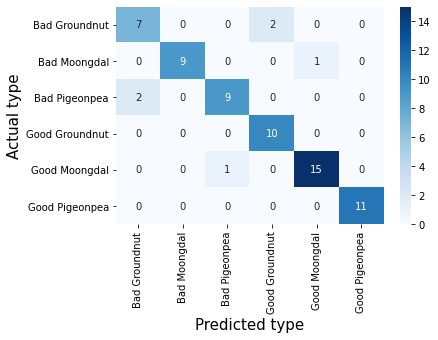

In [27]:
ax= plt.subplot()
sns.heatmap(cm_test, annot=True,fmt="d",cmap='Blues',xticklabels=CATEGORIES, yticklabels=CATEGORIES)
ax.set_xlabel('Predicted type', fontsize=15)
ax.set_ylabel('Actual type', fontsize=15)
plt.show()

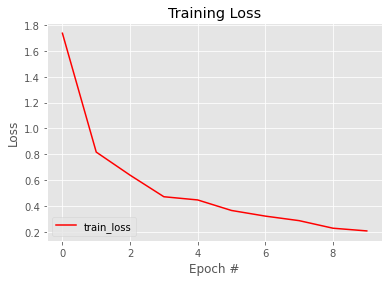

In [28]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss",color='red')
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

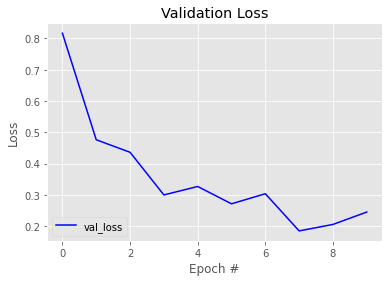

In [29]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss",color='blue')
plt.title("Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

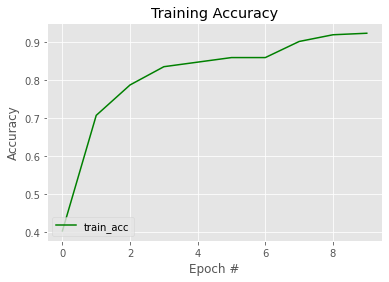

In [30]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc",color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

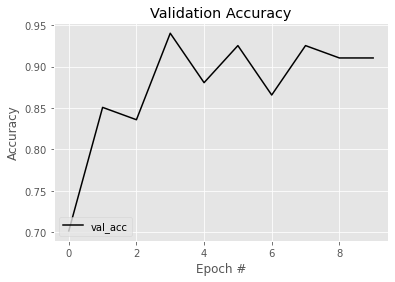

In [31]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc",color='black')
plt.title("Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

# Model Prediction

In [32]:
data = []
path = f"C:/Users/Devadutt/Documents/Desktop/testdata/test13.jpg"
image = load_img(path, target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image)
data.append(image)
data = np.array(data, dtype="float32")
lt = model.predict(data)
pred = np.argmax(lt)
print(CATEGORIES[pred])

Bad Pigeonpea


# Model Testing On Unseen data

In [33]:
actual = ['Good Pigeonpea','Good Pigeonpea','Good Pigeonpea','Good Pigeonpea','Good Groundnut','Good Groundnut',
          'Good Groundnut','Good Groundnut','Good Moongdal','Bad Groundnut','Bad Groundnut','Good Moongdal','Bad Pigeonpea',
          'Good Moongdal','Bad Pigeonpea','Bad Pigeonpea','Bad Moongdal','Bad Moongdal','Bad Moongdal']
columns = ["Actual Type","Predicted type","Validation","Bad Groundnut","Bad Moongdal","Bad Pigeonpea","Good Groundnut","Good Moongdal","Good Pigeonpea"]
dicto={}
predicted = []
correct =0
incorrect=0
for i in range(1,20):
    data = []
    path = f"C:/Users/Devadutt/Documents/Desktop/testdata/test{i}.jpg"
    image = load_img(path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
    data = np.array(data, dtype="float32")
    lt = model.predict(data)
    pred = np.argmax(lt)
    comp=[]
    comp.append(actual[i-1])
    comp.append(CATEGORIES[pred])
    predicted.append(pred)
    comp.append('Correct' if CATEGORIES[pred]==actual[i-1] else 'Incorrect')
    for j in range(0,len(lt[0])):
        comp.append("{:.2f}".format(lt[0][j]*100))
    dicto[i-1] = comp
    
df = pd.DataFrame.from_dict(dicto,orient='index',columns=columns)
display(df)

,Actual Type,Predicted type,Validation,Bad Groundnut,Bad Moongdal,Bad Pigeonpea,Good Groundnut,Good Moongdal,Good Pigeonpea
0,Good Pigeonpea,Good Pigeonpea,Correct,3.76,1.33,1.66,1.12,0.74,91.39
1,Good Pigeonpea,Good Groundnut,Incorrect,8.91,5.02,2.80,51.19,1.14,30.93
2,Good Pigeonpea,Good Pigeonpea,Correct,0.01,0.01,0.06,1.05,0.52,98.35
3,Good Pigeonpea,Good Pigeonpea,Correct,2.92,3.53,2.38,38.70,0.97,51.51
4,Good Groundnut,Good Groundnut,Correct,0.00,0.00,0.00,99.97,0.01,0.01
5,Good Groundnut,Good Groundnut,Correct,0.29,0.01,0.00,99.52,0.04,0.13
6,Good Groundnut,Good Groundnut,Correct,0.01,0.06,0.00,99.93,0.00,0.00
7,Good Groundnut,Good Groundnut,Correct,0.29,0.11,0.15,99.42,0.02,0.02
8,Good Moongdal,Good Moongdal,Correct,15.63,8.64,5.82,9.92,55.46,4.52
9,Bad Groundnut,Bad Groundnut,Correct,87.60,0.36,7.94,3.58,0.08,0.43


In [34]:
for i in range(0,len(actual)):
    actual[i] = int(CATEGORIES.index(actual[i]))
actual

[5, 5, 5, 5, 3, 3, 3, 3, 4, 0, 0, 4, 2, 4, 2, 2, 1, 1, 1]

In [35]:
actual = to_categorical(actual,6)

In [36]:
predicted

[5, 3, 5, 5, 3, 3, 3, 3, 4, 0, 0, 4, 2, 4, 2, 2, 1, 1, 1]

In [37]:
cr = classification_report(actual.argmax(axis=1), predicted,target_names=CATEGORIES)
print(cr)

                precision    recall  f1-score   support

 Bad Groundnut       1.00      1.00      1.00         2
  Bad Moongdal       1.00      1.00      1.00         3
 Bad Pigeonpea       1.00      1.00      1.00         3
Good Groundnut       0.80      1.00      0.89         4
 Good Moongdal       1.00      1.00      1.00         3
Good Pigeonpea       1.00      0.75      0.86         4

      accuracy                           0.95        19
     macro avg       0.97      0.96      0.96        19
  weighted avg       0.96      0.95      0.95        19



In [38]:
cm = confusion_matrix(y_pred=predicted, y_true=actual.argmax(axis=1))
print(cm)

[[2 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 3 0]
 [0 0 0 1 0 3]]


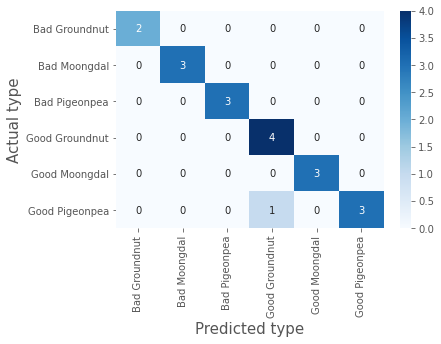

In [39]:
ax= plt.subplot()
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues',xticklabels=CATEGORIES, yticklabels=CATEGORIES)
ax.set_xlabel('Predicted type', fontsize=15)
ax.set_ylabel('Actual type', fontsize=15)
plt.show()

# Model Saving 

In [40]:
model.save("seedmodel.h5")

# Model Converter

In [41]:
from tensorflow import lite

In [42]:
converter = lite.TFLiteConverter.from_keras_model(model)

In [43]:
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Devadutt\AppData\Local\Temp\tmpv2s_4see\assets


In [44]:
open('seedmodel.tflite','wb').write(tfmodel)

9518024